In [ ]:
import pandas as pd
import numpy as np
#from keras.callbacks import TensorBoard
import tensorflow as tf

import keras
from keras import layers
import os
import cv2
import json
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
#from tf.keras.applications.inception_v3 import InceptionV3


X_input=tf.keras.Input(shape=(64,64,3))
output=tf.keras.applications.ResNet50V2(weights="imagenet",pooling=None,include_top=False)(X_input)
model=tf.keras.Model(inputs=X_input,outputs=output)
model.summary()



X_TEST=np.load("/content/drive/My Drive/cs330_dataset/x1_64.npy")
Y_TEST=np.load("/content/drive/My Drive/cs330_dataset/y1_64.npy")

X_TEST= tf.cast(X_TEST, tf.float32) 
Y_TEST= tf.cast(Y_TEST, tf.float32) 


embedding_resnet = model.predict(X_TEST)
print(embedding_resnet.shape)
embedding_resnet_r=tf.reshape(embedding_resnet,shape=(embedding_resnet.shape[0],-1))
Y_TEST = tf.expand_dims(Y_TEST, 1)
embedding_final=tf.concat([Y_TEST, embedding_resnet_r], axis=1)
print(embedding_final.shape)
index=tf.squeeze(embedding_final[:,0:1])
index= tf.cast(index, tf.int32) 
num_class=len(np.unique(index))
print(np.unique(index))
class_mean=tf.math.unsorted_segment_mean(embedding_final, index,num_class)
print(class_mean.shape)

#=====cat all
x_tune=np.load("/content/drive/My Drive/cs330_dataset/x_tune_64_all_embedding_class_mean.npy")
out=tf.concat([class_mean,x_tune],axis=0)
print(out.shape)

np.save("/content/drive/My Drive/cs330_dataset/x1_64_all_embedding_class_mean.npy",out)

In [ ]:
import pandas as pd
x1=np.load("/content/drive/My Drive/cs330_dataset/x4_64_all_embedding_class_mean.npy")
x_tune=np.load("/content/drive/My Drive/cs330_dataset/x_tune_64_all_embedding_class_mean.npy")

x_t_df=pd.DataFrame(x_tune)
x_t_df=x_t_df.transpose()
#print(x_t_df.shape)
x_t_df.columns = ['apple_cab', 'apple_black', 'apple_rust', 'apple_healthy', 'corn_spot', 'corn_rust', 'corn_healthy','corn_blight']


x1_df=pd.DataFrame(x1)
x1_df=x1_df.transpose()
#print(x1_df.shape)
x1_df.columns = ['blueberry_healthy', 'cherry_healthy', 'cherry_mildew', 'grape_rot','grape_measles', 'grape_healthy', 'grape_blight', 'grape_haungliongbing','peach_spont','peach_healthy']
#x1_df.columns = ['tree_swallow', 'swinhoes_pheasant', 'tailorbird', 'taiwan_magpie','takahe','tasmanian_hen', 'teal_duck', 'tit_mouse', 'touchan','townsends_warbler']

x_all=pd.concat([x_t_df, x1_df],
                  axis = 1)

matrix = x_all.corr()

import seaborn as sns
import matplotlib.pyplot as plt

matrix = x_all.corr().round(2)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(matrix, annot=True,center=0, cmap='YlGnBu',annot_kws={"fontsize":8})
#f.show()
#f.savefig("/content/drive/My Drive/cs330_dataset/correaltion_plot_resnet50_x7.png")
matrix.to_csv("/content/drive/My Drive/cs330_dataset/corr_output_x4.csv")

(10, 2353)
(8, 2353)


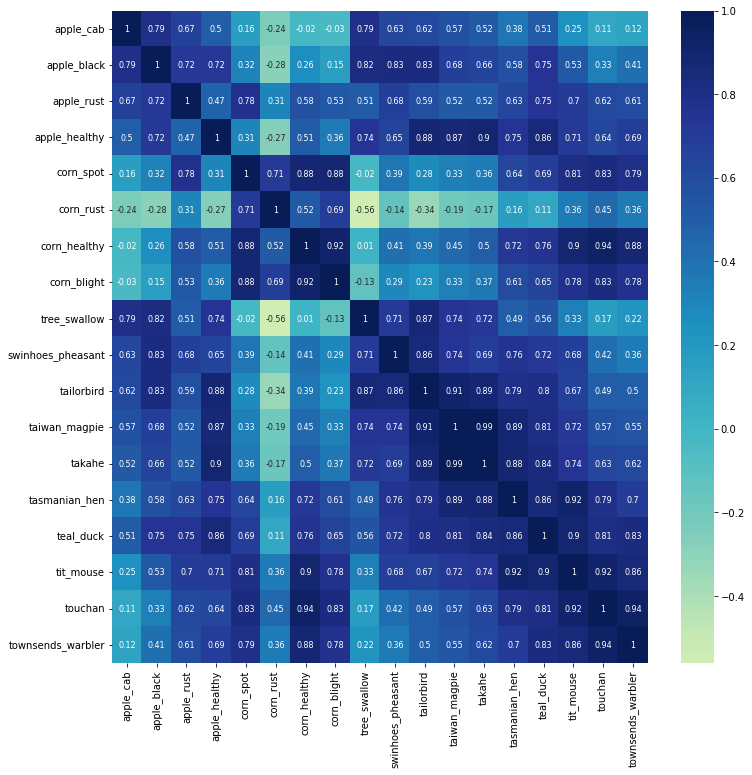

In [ ]:
#============for dataset
import tensorflow as tf
#from tf.keras.applications.inception_v3 import InceptionV3

def get_mean_class_dataset(X_path,Y_path):
  X_TEST=np.load(X_path)
  Y_TEST=np.load(Y_path)

  X_TEST= tf.cast(X_TEST, tf.float32) 
  Y_TEST= tf.cast(Y_TEST, tf.float32) 
  uniq_class=len(np.unique(Y_TEST))

  X_TEST=tf.reshape(X_TEST,shape=(Y_TEST.shape[0],-1))
  Y_TEST = tf.expand_dims(Y_TEST, 1)

  embedding_final=tf.concat([Y_TEST, X_TEST], axis=1)
  index=tf.squeeze(embedding_final[:,0:1])
  index= tf.cast(index, tf.int32) 
  #print(np.unique(index))
  class_mean=tf.math.unsorted_segment_mean(embedding_final, index,uniq_class)
  print(class_mean.shape)
  return class_mean


#=============get dataset embedding
X_path="/content/drive/My Drive/cs330_dataset/x1.npy"
Y_path="/content/drive/My Drive/cs330_dataset/y1.npy"


X_t="/content/drive/My Drive/cs330_dataset/fine_tune_x.npy"
Y_t="/content/drive/My Drive/cs330_dataset/fine_tune_y.npy"

x1=get_mean_class_dataset(X_path,Y_path)
x_tune=get_mean_class_dataset(X_t,Y_t)

x_t_df=pd.DataFrame(x_tune)
x_t_df=x_t_df.transpose()

x_t_df.columns = ['apple_cab', 'apple_black', 'apple_rust', 'apple_healthy', 'corn_spot', 'corn_rust', 'corn_healthy','corn_blight']


x1_df=pd.DataFrame(x1)
x1_df=x1_df.transpose()
#

#x1_df.columns = ['blueberry_healthy', 'cherry_healthy', 'cherry_mildew', 'grape_rot','grape_measles', 'grape_healthy', 'grape_blight', 'grape_haungliongbing','peach_spont','peach_healthy']
x1_df.columns = ['tree_swallow', 'swinhoes_pheasant', 'tailorbird', 'taiwan_magpie','takahe','tasmanian_hen', 'teal_duck', 'tit_mouse', 'touchan','townsends_warbler']

x_all=pd.concat([x_t_df, x1_df],
                  axis = 1).astype(float)

matrix = x_all.corr()
#print(matrix)

import seaborn as sns
import matplotlib.pyplot as plt

matrix = x_all.corr().round(2)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(matrix, annot=True,center=0, cmap='YlGnBu',annot_kws={"fontsize":8})
f.show()
#f.savefig("/content/drive/My Drive/cs330_dataset/corr_dataset_x7.png")
matrix.to_csv("/content/drive/My Drive/cs330_dataset/corr_data_x1.csv")

In [ ]:
import tensorflow as tf
#from tf.keras.applications.inception_v3 import InceptionV3

def embedding_resnet(X_PATH,Y_PATH):
  #====define model
  X_input=tf.keras.Input(shape=(64,64,3))
  output=tf.keras.applications.ResNet50V2(weights="imagenet",pooling=None,include_top=False)(X_input)
  model=tf.keras.Model(inputs=X_input,outputs=output)
  model.summary()

  #====load dataset
  X_TEST=np.load(X_PATH)
  Y_TEST=np.load(Y_PATH)

  X_TEST= tf.cast(X_TEST, tf.float32) 
  Y_TEST= tf.cast(Y_TEST, tf.float32) 


  embedding_resnet = model.predict(X_TEST)
  print(embedding_resnet.shape)
  embedding_resnet_r=tf.reshape(embedding_resnet,shape=(embedding_resnet.shape[0],-1))
  Y_TEST = tf.expand_dims(Y_TEST, 1)
  embedding_final=tf.concat([Y_TEST, embedding_resnet_r], axis=1)
  index=tf.squeeze(embedding_final[:,0:1])
  index= tf.cast(index, tf.int32) 
  num_class=len(np.unique(index))
  class_mean=tf.math.unsorted_segment_mean(embedding_final, index,num_class)
  print(class_mean.shape)
  return class_mean
